# Reconnaissance de chiffres

In [1]:
from sklearn.datasets import fetch_mldata
mnist = fetch_mldata('MNIST original', data_home='mldata')

images sous forme de tableaux de 28 x 28 = 784 couleurs de pixel en niveau de gris

le nombre de features (ou dimensions) en entrée est de 28 x 28 x 1 = 784

In [4]:
print(mnist.data.shape)
print(mnist.target.shape)

(70000, 784)
(70000,)


Le dataset est relativement petit mais pour le modèle K-nn, il est déjà trop gros pour obtenir rapidement des résultats. On va donc effectuer un sampling et travailler sur seulement 5000 données

In [32]:
import sklearn
data, target = sklearn.utils.resample(mnist.data, mnist.target, n_samples=1000)

print(data.shape)
print(target.shape)

(1000, 784)
(1000,)


Séparer training / testing set

In [33]:
from sklearn.model_selection import train_test_split
xtrain, xtest, ytrain, ytest = train_test_split(data, target, test_size=0.2)

[print(x.shape) for x in [xtrain, xtest, ytrain, ytest]]
pass

(800, 784)
(200, 784)
(800,)
(200,)


## Le k-NN

In [20]:
from sklearn import neighbors

knn = neighbors.KNeighborsClassifier(n_neighbors=3)
knn.fit(xtrain, ytrain)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=3, p=2,
           weights='uniform')

In [36]:
error = 1 - knn.score(xtest, ytest)
print('Erreur: %f' % error)

Erreur: 0.145000


## Optimisation du score sur les données test

In [26]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')

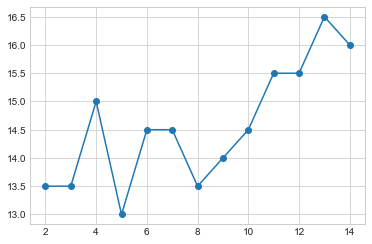

In [34]:
errors = []
ks = range(2,15)
for k in ks:
    knn = neighbors.KNeighborsClassifier(k)
    errors.append(100*(1 - knn.fit(xtrain, ytrain).score(xtest, ytest)))
plt.plot(ks, errors, 'o-')
plt.show()

## Affichage

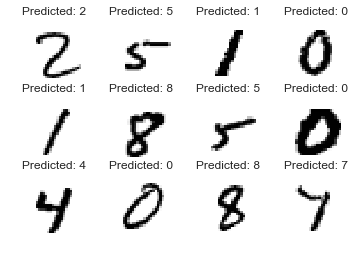

In [38]:
import numpy as np
np.random.seed()

data, target = sklearn.utils.resample(mnist.data, mnist.target, n_samples=5000)
xtrain, xtest, ytrain, ytest = train_test_split(data, target, test_size=0.2)

# On récupère le classifieur le plus performant
knn = neighbors.KNeighborsClassifier(7)
knn.fit(xtrain, ytrain)

# On récupère les prédictions sur les données test
predicted = knn.predict(xtest)

# On redimensionne les données sous forme d'images
images = xtest.reshape((-1, 28, 28))

# On selectionne un echantillon de 12 images au hasard
select = np.random.randint(images.shape[0], size=12)

# On affiche les images avec la prédiction associée
for index, value in enumerate(select):
    plt.subplot(3,4,index+1)
    plt.axis('off')
    plt.imshow(images[value],cmap=plt.cm.gray_r,interpolation="nearest")
    plt.title('Predicted: %i' % predicted[value])

plt.show()

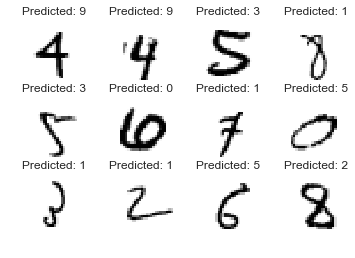

In [39]:
# on récupère les données mal prédites 
misclass = (ytest != predicted)
misclass_images = images[misclass,:,:]
misclass_predicted = predicted[misclass]

# on sélectionne un échantillon de ces images
select = np.random.randint(misclass_images.shape[0], size=12)

# on affiche les images et les prédictions (erronées) associées à ces images
for index, value in enumerate(select):
    plt.subplot(3,4,index+1)
    plt.axis('off')
    plt.imshow(misclass_images[value],cmap=plt.cm.gray_r,interpolation="nearest")
    plt.title('Predicted: %i' % misclass_predicted[value])

plt.show()